# Name : Asim Awad Hussein Osman

# Introduction: Calorimeter Showers

 1- The electronic calorimeter, as its name indicates, is measuring the energy of incoming electrons.

 2- Problem? There can be noisy signals in electromagnetic calorimeters that are generated by hadrons, not electrons.

 3- Goal : Code a classifier to select electron-showers (signal) from hadron-showers (background).

 4- To this end, you are given a dataset of shower characterists from previous measurements where the incoming particle was known. The main features are the depth and the width.

 The **Depth** is along the direction of the incoming particle and the **width** is the dimension perpendicular to it.

# The Dataset

In [56]:
#Imports
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
random.seed(0)

In [128]:
from google.colab import drive
drive.mount('/content/gdrive')
data_path  = "/content/gdrive/MyDrive/calo_shower_data.csv"
df = pd.read_csv(data_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


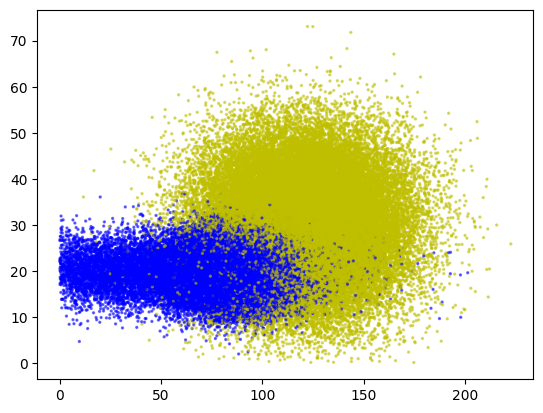

In [59]:
# draw scatterplot
categories = df['type'].apply(lambda x: (1 if x == 'electron'  else 0)).to_numpy()
colormap = np.array(['y', 'b'])
plt.scatter(df['shower_depth'], df['shower_width'], s = 2, alpha = 0.5 , c = colormap[categories])
plt.show()

# 2. Feature Scaling

Explain

If the parameters are initialized randomly between 0 and 1 and the data are not zero-centered, what happens to the gradient descent? Explain the behaviour.

In [129]:
# Get the mean of each feature vector then substract it from each sample in two new created and mean normalized features
mean_x1 = df['shower_depth'].mean()
std_x1 = df['shower_depth'].std()
mean_x2 = df['shower_width'].mean()
std_x2 = df['shower_width'].std()
# scale both feature vectors (depth and width)
df['scaled_depth'] = df['shower_depth'].apply(lambda x : (x - mean_x1 )/std_x1)
df['scaled_width'] = df['shower_width'].apply(lambda x : (x - mean_x2 )/std_x2)

# 3. Data Prep

In [61]:
# add a dummy feature vector (all 1's)
df['x_0'] = df['scaled_depth'].apply(lambda x : 1)
# map the predictions from 'electrons', 'hadron' to '1' and '0'
df['y']  = df['type'].apply(lambda x : 1 if x == "electron" else 0)
# Final data after processing
X = df[['x_0','scaled_depth','scaled_width']]
y  = df[['y']]

# 4. DataFrames to Numpy

In [130]:
# split the data to train and test sets
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()

In [131]:
print(f'X_train size : {X_train.shape} | X_test size  : {X_test.shape}')
print(f'y_train size : {y_train.shape} | y_test size  : {y_test.shape}')
# X_train size : (80000, 3) | X_test size  : (20000, 3)
# y_train size : (80000, 1) | y_test size  : (20000, 1)

X_train size : (80000, 3) | X_test size  : (20000, 3)
y_train size : (80000, 1) | y_test size  : (20000, 1)


In [64]:
# """ what test_size represent is the percentage of entire example
#  that will be used as test set to test the performance of the model"""


In [132]:
# the linear function
def lin_sum(X, thetas):
  return np.dot(X,thetas.T)

# The Logistic Sigmoid Function
def sigmoid(z):
  return 1/(1 + np.exp(-z))

# The hypothesis Function for logestic regression
def hypothesis(X,thetas):
  linear_sum = lin_sum(X,thetas)
  return sigmoid(linear_sum)


In [133]:
# The cross entropy cost function
def cross_entropy_cost(y_train, y_preds):
  m = y_train.shape[0]
  cost = 0
  Entropy = (-y_train * np.log(y_preds) - (1-y_train) * np.log(1-y_preds))/m

  return np.sum(Entropy)

# the function calculating the derivatives
def derivatives_cross_entropy(y_preds, y_true, x_feature):
  # Your code here
  m = len(x_feature)

  return np.dot((y_preds - y_true).T,x_feature)/m

# This part was Done withh the help of The smart Emmanuel AYANFUL, we discoverd that using numpy arry is much much faster the ordinary for loops



In [68]:
# Hyperparameters
alpha = .5
N =  500

# Number of features + 1 (number of columns in X)
n = X_train.shape[1]
# Initialization of theta *row vector*
thetas = np.random.randn(1,3)

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")

# -------------------
#   Start iterations
# -------------------
for i in range(1, N+1):

  # Get predictions (hypothesis function)
  y_preds = hypothesis(X_train,thetas)
  y_preds_test = hypothesis(X_test,thetas)

  # Calculate and store costs with train and test datasets
  J_train = cross_entropy_cost(y_train, y_preds); costs_train.append(J_train)
  J_test  = cross_entropy_cost(y_test, y_preds_test); costs_test.append(J_test)

  # Get partial derivatives d/dTheta_jmore
  dJ_thetas = np.zeros(shape=(1, n))

  # Calculate new theta parameters:
  dJ_thetas[0][0] = derivatives_cross_entropy(y_preds, y_train, X_train[:,0])
  dJ_thetas[0][1] = derivatives_cross_entropy(y_preds, y_train, X_train[:,1])
  dJ_thetas[0][2] = derivatives_cross_entropy(y_preds, y_train, X_train[:,2])

  # Update the parameters for the next iteration
  thetas[0][0] -= alpha * dJ_thetas[0][0]
  thetas[0][1] -= alpha * dJ_thetas[0][1]
  thetas[0][2] -= alpha * dJ_thetas[0][2]

  # --------------------
  #  P R I N T O U T S
  # --------------------
  # Every 10 iterations and n > 100 every 100 iterations
  if (i<100 and i % 10 == 0) or (i>100 and i % 100 == 0):
    print('[%d]\tt0 = %4.4f  t1 = %4.4f  t2 = %4.4f  Cost = %4.4f  dJ0 = %4.4f  dJ1 = %4.4f  dJ2 = %4.4f' %
         ( i,   thetas[0][0], thetas[0][1], thetas[0][2],   J_train,  dJ_thetas[0,0],   dJ_thetas[0,1],   dJ_thetas[0,2]))

print(f'\nEnd of gradient descent after {i} iterations')

print('Optimized thetas:')
print(f'Theta 0 = {thetas[0][0]:.4f}, Theta 1 = {thetas[0][1]:.4f}, Theta 2 = {thetas[0][2]:.4f}')

Starting gradient descent

[10]	t0 = -0.4566  t1 = -1.3588  t2 = -0.7990  Cost = 0.3733  dJ0 = -0.0703  dJ1 = 0.0663  dJ2 = 0.0818


<ipython-input-68-5cd2627df087>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dJ_thetas[0][0] = derivatives_cross_entropy(y_preds, y_train, X_train[:,0])
<ipython-input-68-5cd2627df087>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dJ_thetas[0][1] = derivatives_cross_entropy(y_preds, y_train, X_train[:,1])
<ipython-input-68-5cd2627df087>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dJ_thetas[0][2] = derivatives_cross_entropy(y_preds, y_train, X_train[:

[20]	t0 = -0.2622  t1 = -1.6075  t2 = -1.0798  Cost = 0.3314  dJ0 = -0.0219  dJ1 = 0.0404  dJ2 = 0.0416
[30]	t0 = -0.2025  t1 = -1.7766  t2 = -1.2388  Cost = 0.3189  dJ0 = -0.0062  dJ1 = 0.0294  dJ2 = 0.0257
[40]	t0 = -0.1895  t1 = -1.9046  t2 = -1.3431  Cost = 0.3130  dJ0 = -0.0004  dJ1 = 0.0229  dJ2 = 0.0177
[50]	t0 = -0.1941  t1 = -2.0062  t2 = -1.4179  Cost = 0.3097  dJ0 = 0.0017  dJ1 = 0.0184  dJ2 = 0.0131
[60]	t0 = -0.2050  t1 = -2.0889  t2 = -1.4746  Cost = 0.3076  dJ0 = 0.0024  dJ1 = 0.0152  dJ2 = 0.0101
[70]	t0 = -0.2176  t1 = -2.1575  t2 = -1.5194  Cost = 0.3062  dJ0 = 0.0025  dJ1 = 0.0126  dJ2 = 0.0081
[80]	t0 = -0.2299  t1 = -2.2151  t2 = -1.5557  Cost = 0.3052  dJ0 = 0.0024  dJ1 = 0.0107  dJ2 = 0.0066
[90]	t0 = -0.2413  t1 = -2.2639  t2 = -1.5858  Cost = 0.3045  dJ0 = 0.0022  dJ1 = 0.0091  dJ2 = 0.0055
[200]	t0 = -0.3053  t1 = -2.5117  t2 = -1.7330  Cost = 0.3026  dJ0 = 0.0005  dJ1 = 0.0020  dJ2 = 0.0012
[300]	t0 = -0.3203  t1 = -2.5682  t2 = -1.7662  Cost = 0.3025  dJ0 = 

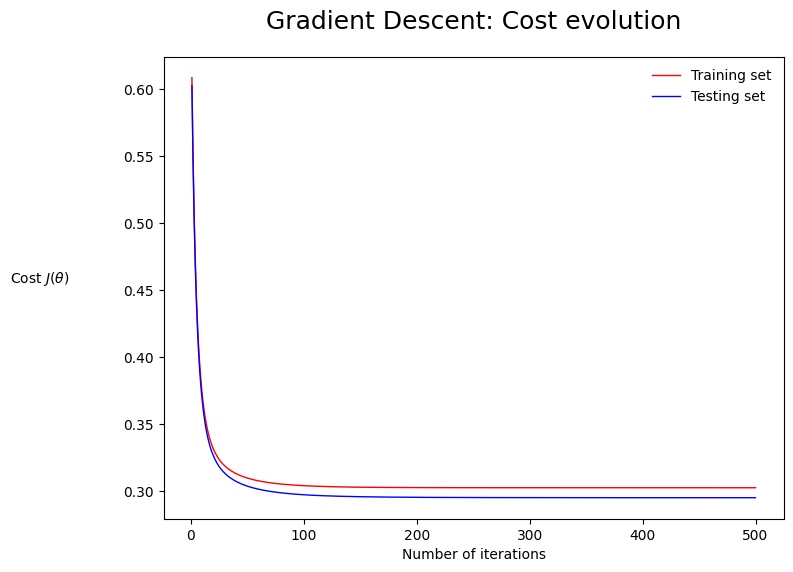

In [69]:
def plot_cost_vs_iter(train_costs, test_costs, title= "Gradient Descent: Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

# call the function now
plot_cost_vs_iter(costs_train, costs_test)

In [ ]:
# 7.1: Describe the plot; what is the fundamental difference between the two series train and test?
# Training set : used to train the model how to classify the data
# Test Set is uset to check weather or not the model learned how to classify data to a high degree of accuracy : measure performance
# The training_set is used  during model training to find the model parameters, it is labeled data unlike the unlabeled test set which is used to asses the final model parameters

In [ ]:
# 7.2: What would it mean if there would be a bigger gap between the test and training values of the cost?
#  bigger values of cost in the test set compared to the cost values of the training set is a strong indication that the model is not generalizing well given the trainig data. Also known as overfitting
#  if the training cost is less that the test cost this mean that the model is generalizing well to th data

# 8. Performance

In [85]:
thetas

array([[-0.32619552, -2.59019454, -1.7791973 ]])

In [134]:
# A function To use the trined model and make Predictions
def make_predictions(thetas, X, y, boundary=0.5):

  bin_preds = [1 if value > boundary else 0 for value in hypothesis(X, np.array(thetas))[:,0] ]

  return bin_preds
preds = make_predictions(thetas, X_test, y_test, boundary = 0.5) ; obs_test = y_test[:,0]

In [135]:
# Write a function computing the accuracy of the classifier:

def get_accuracy(obs_values, pred_values):
  # accuracy = true predictions/all predictions
  m = len(pred_values)
  true_predictions= 0
  for obs,pred in zip(obs_values,pred_values):
    if  obs == pred :
      true_predictions += 1
  accuracy = true_predictions / m
  return accuracy

In [136]:
# calling the function using the test set
accuracy = get_accuracy(y_test, preds)
accuracy

0.8806

In [137]:
# recall calculation Function
# recall = true positives / true positives + dalse negatives
def get_recall(actual_values, pred_values):
  n = len(pred_values)
  true_positives = 0
  False_negatives = 0
  for i in range(n):
    if pred_values[i] == 1 and actual_values[i] == 1 :
      true_positives += 1
    elif pred_values[i] == 0 and actual_values[i] == 1 :
      False_negatives +=1
  recall = true_positives / (true_positives +False_negatives)
  return recall



In [138]:
recall = get_recall(y_test, preds)
recall

0.9049005824462744

# Decision Boundary  
This part was also done with the help of Emmanuel AYANFUL in the get_boundary_line_x2 function and the part relating to understanding the scale-unscale procedure

In [141]:
# split the data to signal and background
signal =df[df['type'] == 'electron']
signal = signal[['shower_depth','shower_width']]

background =df[df['type'] == 'hadron']
background = background[['shower_depth','shower_width']]


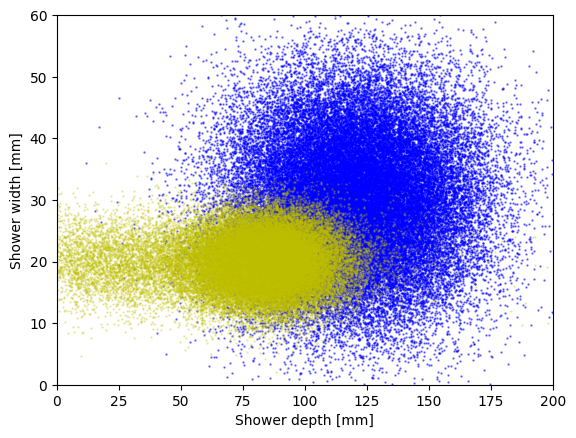

In [140]:
# Plot the two classes in a scatter plot

X1NAME = 'shower_depth'; X1LABEL = 'Shower depth [mm]'
X2NAME = 'shower_width'; X2LABEL = 'Shower width [mm]'
thresholds = [0.9,0.75,0.5,0.25,0.1]
X1MIN  = 0 ; X1MAX = 200
X2MIN  = 0 ; X2MAX =  60
fig, ax = plt.subplots()
scat_had = ax.scatter(background[X1NAME] , background[X2NAME], s=2 , c ='b' , marker = '.' ,alpha=0.5)
scat_el  = ax.scatter(signal[X1NAME] , signal[X2NAME], s=2 , c ='y' , marker = '.' , alpha = 0.3)
ax.set(xlim=(X1MIN, X1MAX), ylim=(X2MIN, X2MAX))
ax.set_xlabel(X1LABEL); ax.set_ylabel(X2LABEL)
plt.show()

In [142]:
# functions to calculate the decision boundary
# Reversed Sigmoid
def rev_sigmoid(y_pred):
  import math
  return math.log(y_pred/(1-y_pred))

# Input Scaling to scale the min,max data points
def scale_inputs(points_list, X_features):
  mean_x1 = X_features.mean()
  std_x1 = X_features.std()
  return [(x - mean_x1 )/std_x1 for x in points_list]

# unscale to return the min, max point to the original state
def unscale_inputs(scaled_input_feature,X_features):
    mean_x1 = X_features.mean()
    std_x1 = X_features.std()
    return [point * std_x1 + mean_x1 for point in scaled_input_feature]

# get the boundary line endpoints, corresponding to x1_min and x1_max
def get_boundary_line_x2(threshold, thetas, x1_min=X1MIN, x1_max=X1MAX):
  #first Scale x1_min , x1_max
  scaled_x1_min,scaled_x1_max = scale_inputs([x1_min,x1_max],  df['shower_depth'])

  # Finding the values  of X2 min and X2 Max
  rev_sig = rev_sigmoid(threshold)
  scaledx2_min = (rev_sig-(thetas[0][0] + thetas[0][1]*scaled_x1_min))/(thetas[0][2])
  scaledx2_max = (rev_sig-(thetas[0][0] + thetas[0][1]*scaled_x1_max))/(thetas[0][2])

  # Now we unscale X2_min X2_max

  X2_min, X2_max = unscale_inputs([scaledx2_min, scaledx2_max], df['shower_width'])
  return X2_min, X2_max



In [115]:

# Raw scatter plot
def plot_scatter(sig, bkg,thresholds, boundaries=False,
                 x1name=X1NAME, x1label=X1LABEL, x1min=X1MIN, x1max=X1MAX,
                 x2name=X2NAME, x2label=X2LABEL, x2min=X2MIN, x2max=X2MAX,
                 figsize=(6, 6), fontsize=20, alpha=0.2, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=figsize)

  # ------------------
  #      A X E S
  # ------------------
  ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))
  ax.set_xlabel(x1label); ax.set_ylabel(x2label)

  # ------------------
  #   S C A T T E R
  # ------------------
  scat_el = ax.scatter(sig[x1name], sig[x2name], marker='.', s=1, c='black', alpha=alpha)
  scat_had= ax.scatter(bkg[x1name], bkg[x2name], marker='.', s=1, c='red', alpha=alpha)

  # ----------------------
  #  B O U N D A R I E S
  # ----------------------
  if boundaries:


    x2_left, x2_right = get_boundary_line_x2(thresholds[0], thetas, x1_min=X1MIN, x1_max=X1MAX)
    ax.plot([x1min, x1max], [x2_left, x2_right], color='b', ls=':', lw=1)

    x2_left, x2_right = get_boundary_line_x2(thresholds[1], thetas, x1_min=X1MIN, x1_max=X1MAX)
    ax.plot([x1min, x1max], [x2_left, x2_right], color='g', ls='--', lw=1.2)

    x2_left, x2_right = get_boundary_line_x2(thresholds[2], thetas, x1_min=X1MIN, x1_max=X1MAX)
    ax.plot([x1min, x1max], [x2_left, x2_right], color='r', ls='-', lw=1.5)

    x2_left, x2_right = get_boundary_line_x2(thresholds[3], thetas, x1_min=X1MIN, x1_max=X1MAX)
    ax.plot([x1min, x1max], [x2_left, x2_right], color='g', ls='--', lw=1.2)

    x2_left, x2_right = get_boundary_line_x2(thresholds[4], thetas, x1_min=X1MIN, x1_max=X1MAX)
    ax.plot([x1min, x1max], [x2_left, x2_right], color='b', ls=':', lw=1)

    # ... stuff to do here

  # ------------------
  #   L E G E N D S
  # ------------------
  # Legend scatter
  h = [scat_el, scat_had]
  legScatter = ax.legend(handles=h, labels=['electron', 'hadron'],
                         title="Shower type\n", title_fontsize=fontsize, markerscale=20,
                         bbox_to_anchor=(1.06, 0.8), loc="center left" , frameon=False)

  # Legend boundary
  if boundaries:
    ax.add_artist(legScatter)
    legLines = ax.legend(title="Decision boundaries",
                       bbox_to_anchor=(1.06, 0.3), loc="center left",
                       title_fontsize=fontsize, frameon=False)

  ax.set_title(title, fontsize=fontsize, pad=20)
  print('\n\n') ; plt.show()

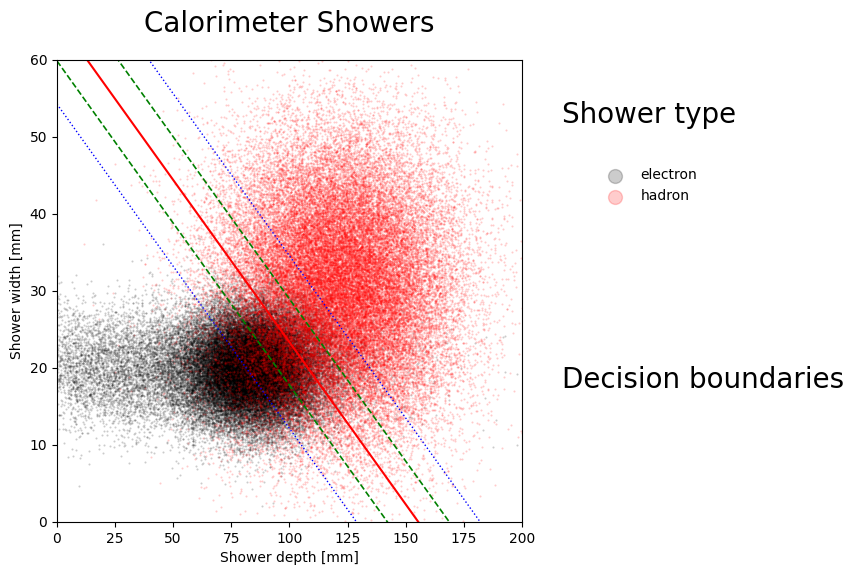

In [116]:
# We call our decision boundary drawing function
plot_scatter(signal, background,thresholds, boundaries=True,
             figsize=(6, 6), fontsize=20, alpha=0.2, title="Calorimeter Showers")